# Visualize users behavior

This guide describes set of Retentioneering methods intended for visual analysis of complex user behaviors in app or website. We will discuss rete.plot_graph() function and its parameters to visualize your dataset and obtain insights.

## Before you start

install retentioneering if running from google.colab or for the first time:

In [ ]:
!pip3 install retentioneering

To start with these tools, you need to upload your own .csv with clickstream data (as described in Getting started) or you can use the retentioneering.datasets.load_simple_shop() for our sample dataset.

So for the first step please make sure you have Retentioneering imported and dataframe with your clickstream is created, and by calling retentioneering.config.update you defined for the library where the essential user_col, event_col, event_time_col are located in your loaded dataframe:

In [1]:
import retentioneering

# load sample data
data = retentioneering.datasets.load_simple_shop()

retentioneering.config.update({
    'user_col': 'user_id',
    'event_col':'event',
    'event_time_col':'timestamp',
})

We suggest you have a quick exploration of your dataframe data before moving forward.

## Introduction to rete.plot_graph()

### Visualize trajectories of many users as interactive graph network

As your data have transitions of many users, they have both individual and common patterns in the way they make transitions between events. rete.plot_graph() combines all the paths together to show you how user was navigating through your digital product:

(graph is interactive and you can move around the nodes to explore)

In [2]:
data.rete.plot_graph(norm_type=None,
                     weight_col=None,
                     thresh=250)

'experiments/graph_2020-10-03 21_41_03_161107.html'

The beauty of the graph representation is that you can clearly see the what pages, screens and other types of events actually were connected by direct user transitions. on top of that, graph can have weights attributed to its edges, which can be very helpful to understand how many users’ transitions or unique users with this edge was found in your data.

Here, numbers for each edge (edge weights) correspond to total number of given transitions in the dataset (for example, total number of ‘cart’->’delivery_choice’ transitions in example above is 1686). Parameter ‘thresh’ sets a limit, below which edge stop showing on a graph to avoid cluttering. The thickness of each edge strictly corresponds to its weight value, while the size of the nodes by default is given by the relative occurrence of the event to the total amount of all events occurrences.

Some of the events might be particular importance to visualize. To highlight those events with red or green colors (and all inbound edges) use parameter targets to provide a dictionary with required colors (‘green’ or ‘red’):

In [4]:
data.rete.plot_graph(norm_type=None,
                     weight_col=None,
                     thresh=250,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2020-10-03 21_45_11_337097.html'

In this first example above we have just visualized number of transitions attributed to edge, regardless how many users, but depending on you task you may want to visualize not amount of transitions, but the number unique users or sessions having that kind of transition. Alternatively, you may want to use percentage instead of absolute quantities. In the chapters below we explore the options for that.

## rete.plot_graph() parameters

###  Edge weights: Quantify trajectories to understand the most and least common patterns of user flow.

Here we introduce weight_col argument of plot_graph.

When you look at the graph and observe edges, which are transitions between event nodes, you may ask the following questions:

**A. How many transitions with this edge actually happened in my dataset? To answer this question run data.rete.plot_graph(norm_type=None, weight_col=None)**

**B. How many unique users actually made transitions with this edge in my dataset? To answer this question run data.rete.plot_graph(norm_type=None, weight_col=’user_id’)**

In [6]:
data.rete.plot_graph(norm_type=None,
                     weight_col='user_id',
                     thresh=250,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2020-10-03 21_50_06_629290.html'

As you can see weight_col argument of rete.plot_graph() defines which column of your dataset will be used to count and attribute as edge weight value. Following this logic you can introduce dataset with session or segment column, then running data.rete.plot_graph with (norm_type=None, weight_col=’session’) or (norm_type=None, weight_col=’segment’) you will obtain the graph with weights for how many sessions had the transition with that edge or how many segments had such transition. This is example of Retentioneering logic, as we provide the tool, but it is up to your vision how you can make more sense with your data.

### 3. Relative weights for edge. Options to normalize your transitions data

Here we introduce norm_type argument of plot_graph. Above questions like A and B provide absolute numbers attributed for each edge. But some questions require ratios or percentage values:

**C. Is this transition frequent? What is the fraction of the transitions like that across all transitions in dataset? To answer this question run data.rete.plot_graph(norm_type=’full’, weight_col=None)**

This type of normalization provides normalization by entire dataset. To understand intuitively how to interpret results let’s consider an example:

In [ ]:
data.rete.plot_graph(norm_type='full',
                     weight_col=None,
                     thresh=0.01,
                     targets = {'payment_done':'green',
                                'lost':'red'})

In this case percentage values shown on the graph edges indicates the percentage of given transition from all transitions. For example, transition ‘catalog’->’catalog’ represents 15% of all transitions in the dataset.

Question C needs special care and attention. If some user makes 100 transitions at the specific edge does not mean that another user also finds this transition important for their flow in the app and would go for even 1 transition like that. Therefore, to justify transitions number specific to different users and obtain conversion rates for user transitions between nodes you should explore question:

**D. Is this transition frequent across different users? What percentage of users make this transition? To answer this question run data.rete.plot_graph(norm_type= ‘full’, weight_col=’user_id’)**

In [ ]:
data.rete.plot_graph(norm_type='full',
                     weight_col='user_id',
                     thresh=0.06,
                     targets = {'payment_done':'green',
                                'lost':'red'})

In this case, % on graph edges corresponds to % of users from the dataset who have given transition. For example, 36% of all users made a transition from ‘cart’ to ‘delivery_choice’.

When you look at the whole graph and the conversion rates to your target events is low, it is hard to explore the user behavior nearby the targets, as the edges under norm_type=’full’ normalization may appear small and even thresholded. But it is clear that as long as target events are important you may need to pay special attention around that nodes and find the pivot points. This search for pivot points may be formulated as the question:

**E. What were the farther choices for the user who had reached the given event? How popular were that choices among the users (sessions, segments)? To answer this question run data.rete.plot_graph(norm_type=’node’, weight_col=’user_id’)**

For example, sometimes we would like to know, from all users, who reach ‘cart’ what percent transitioned to ‘delivery_choice’, or from all users who reach ‘payment_card’ what percent completed the purchase (transitioned to ‘payment_done’).

Literally norm_type=’node’ would get your edge weights normalized across all edges that are outbound edges within the same node.

In [ ]:
data.rete.plot_graph(norm_type='node',
                     weight_col='user_id',
                     thresh=0.2,
                     targets = {'payment_done':'green',
                                'lost':'red'})

Here, percent on edge A –> B correspond to percent of users who transtioned to state B out all users who got to state A. For example, we can tell that 70% of users who got to ‘cart’ transitioned to ‘delivery_choice’. Or 91% of users who select ‘payment_card’ transitioned to ‘payment_done’ and only 54% of users who selected ‘payment_cash’ transitioned to ‘payment_done’.

It is important to notice, that norm_type=’node’ combined with weight_col=None provides the edge normalization so that the sum of edge weights that are outbound from the same node would always sum to 1 (before threshold is applied). This property makes this kind of edge weighting perfect for Markov-Chain modelling, as the resulting edge weights may represent transition probabilities at node defined by your input dataset.

## Edge weighting options

![image.png](attachment:image.png)

In [7]:
data.rete.plot_graph(norm_type='full',
                     weight_col=None,
                     thresh=0.01,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2020-10-03 21_51_28_568738.html'

In this case percentage values shown on the graph edges indicates the percentage of given transition from all transitions. For example, transition ‘catalog’->’catalog’ represents 15% of all transitions in the dataset.

Question C needs special care and attention. If some user makes 100 transitions at the specific edge does not mean that another user also finds this transition important for their flow in the app and would go for even 1 transition like that. Therefore, to justify transitions number specific to different users and obtain conversion rates for user transitions between nodes you should explore question:

**D. Is this transition frequent across different users? What percentage of users make this transition? To answer this question run data.rete.plot_graph(norm_type= ‘full’, weight_col=’user_id’)**

In [9]:
data.rete.plot_graph(norm_type='full',
                     weight_col='user_id',
                     thresh=0.06,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2020-10-03 21_54_58_045228.html'

In this case, % on graph edges corresponds to % of users from the dataset who have given transition. For example, 36% of all users made a transition from ‘cart’ to ‘delivery_choice’.

When you look at the whole graph and the conversion rates to your target events is low, it is hard to explore the user behavior nearby the targets, as the edges under norm_type=’full’ normalization may appear small and even thresholded. But it is clear that as long as target events are important you may need to pay special attention around that nodes and find the pivot points. This search for pivot points may be formulated as the question:

**E. What were the farther choices for the user who had reached the given event? How popular were that choices among the users (sessions, segments)? To answer this question run data.rete.plot_graph(norm_type=’node’, weight_col=’user_id’)**

For example, sometimes we would like to know, from all users, who reach ‘cart’ what percent transitioned to ‘delivery_choice’, or from all users who reach ‘payment_card’ what percent completed the purchase (transitioned to ‘payment_done’).

Literally norm_type=’node’ would get your edge weights normalized across all edges that are outbound edges within the same node.

In [11]:
data.rete.plot_graph(norm_type='node',
                     weight_col='user_id',
                     thresh=0.2,
                     targets = {'payment_done':'green',
                                'lost':'red'})

'experiments/graph_2020-10-03 21_57_24_108841.html'

Here, percent on edge A –> B correspond to percent of users who transtioned to state B out all users who got to state A. For example, we can tell that 70% of users who got to ‘cart’ transitioned to ‘delivery_choice’. Or 91% of users who select ‘payment_card’ transitioned to ‘payment_done’ and only 54% of users who selected ‘payment_cash’ transitioned to ‘payment_done’.

It is important to notice, that norm_type=’node’ combined with weight_col=None provides the edge normalization so that the sum of edge weights that are outbound from the same node would always sum to 1 (before threshold is applied). This property makes this kind of edge weighting perfect for Markov-Chain modelling, as the resulting edge weights may represent transition probabilities at node defined by your input dataset.

## Edge weighting options

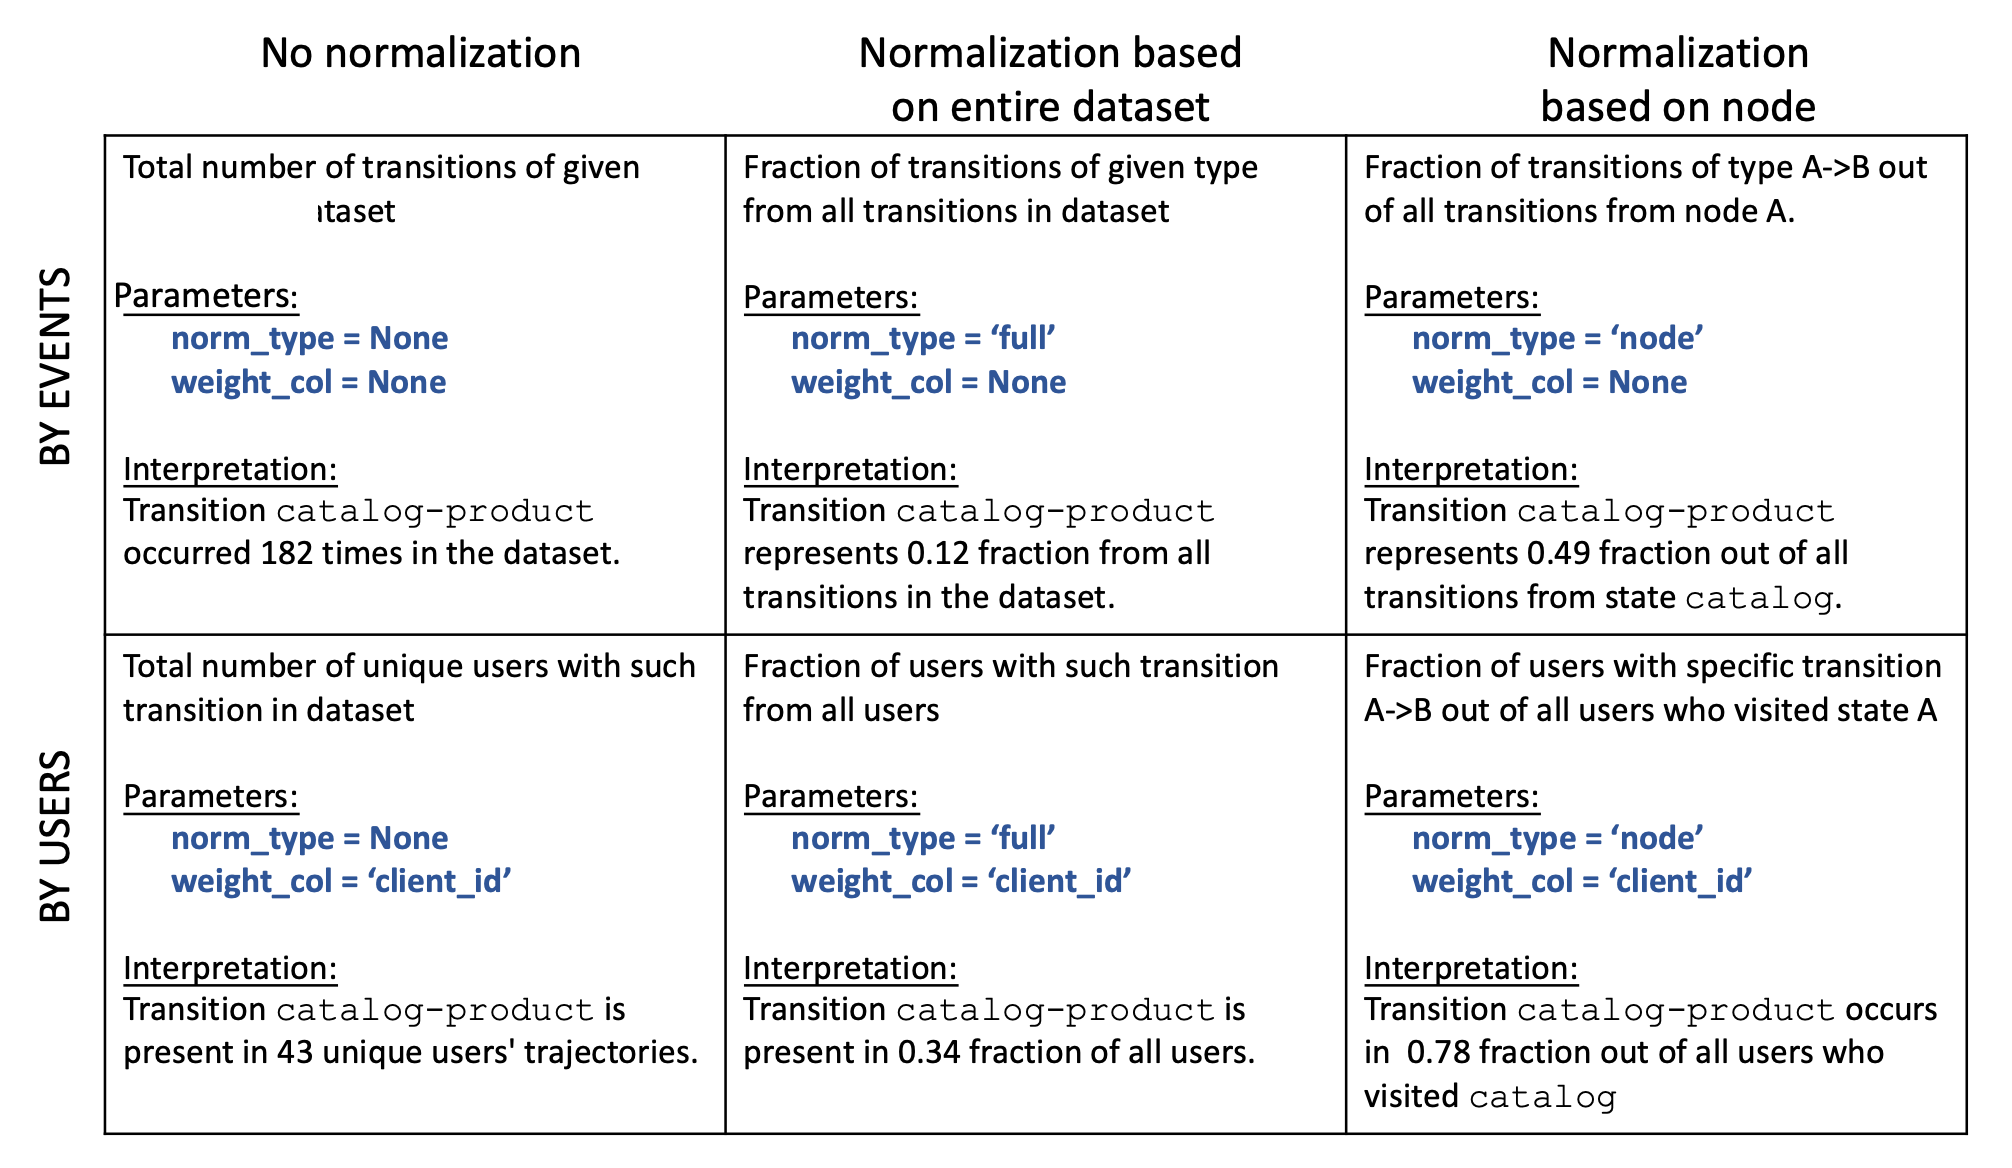